<a href="https://colab.research.google.com/github/rihannababzadeh/Machine-Learning-Projects/blob/main/2022_03_Predicting_Time_Series_Data_imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting and imputing Time Series Data
> Paper: A multisource and multivariate dataset for indoor localization methods based on WLAN and geo-magnetic field fingerprinting -Ipin2016

>Dataset: measure1_smartphone_sens

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

In [ ]:
#loading the dataset with missing values
from google.colab import files
uploaded = files.upload()
import io
data = pd.read_csv(io.BytesIO(uploaded['data1.csv']))
data.head()
# in this file, I took one day as a sample

Saving data1.csv to data1.csv


,timestamp,AccelerationX,AccelerationY,AccelerationZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ,Z-AxisAgle(Azimuth),X-AxisAngle(Pitch),Y-AxisAngle(Roll),GyroX,GyroY,GyroZ
0,1.422629e+09,-3.577,2.104,9.078,-5.4,-17.9,-28.2,126.404,-12.169,-21.001,0.0,0.0,0.0
1,1.422629e+09,-3.424,2.927,9.374,-4.3,-21.9,-26.9,134.694,-11.322,-25.898,0.0,0.0,0.0
2,1.422629e+09,-2.505,2.908,8.867,-0.7,-24.4,-26.5,150.906,-17.523,-15.017,0.0,0.0,0.0
3,1.422629e+09,-5.473,1.472,9.394,0.3,-25.7,-26.9,138.022,-21.068,-23.941,0.0,0.0,0.0
4,1.422629e+09,-3.414,2.018,8.187,3.7,-29.6,-23.9,163.519,-12.814,-22.046,0.0,0.0,0.0


In [ ]:
#loading the dataset with missing values
from google.colab import files
uploaded = files.upload()
import io
data = pd.read_csv(io.BytesIO(uploaded['data2.csv']))
data.head()
# in this file, I took one day as a sample

Saving data2.csv to data2 (1).csv


,timestamp,AccelerationX,AccelerationY,AccelerationZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ,Z-AxisAgle(Azimuth),X-AxisAngle(Pitch),Y-AxisAngle(Roll),GyroX,GyroY,GyroZ
0,1422629483,-3.577,2.104,9.078,-5.4,-17.9,-28.2,126.404,-12.169,-21.001,0.0,0.0,0.0
1,1422629484,-3.424,2.927,9.374,-4.3,-21.9,-26.9,134.694,-11.322,-25.898,0.0,0.0,0.0
2,1422629484,-2.505,2.908,8.867,-0.7,-24.4,-26.5,150.906,-17.523,-15.017,0.0,0.0,0.0
3,1422629484,-5.473,1.472,9.394,0.3,-25.7,-26.9,138.022,-21.068,-23.941,0.0,0.0,0.0
4,1422629484,-3.414,2.018,8.187,3.7,-29.6,-23.9,163.519,-12.814,-22.046,0.0,0.0,0.0


In [ ]:
# import pandas as pd
# pd.options.mode.chained_assignment = None  # default='warn'

# data.iloc[0]['timestamp'] =data.iloc[0]['timestamp']*0.001

In [ ]:
data.loc[2161]['timestamp'] 

1422630051.0

In [ ]:
res = data

In [ ]:
data = res

In [ ]:
data.describe()  # Getting a grasp of our numerical value statistical properties. 

,timestamp,AccelerationX,AccelerationY,AccelerationZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ,Z-AxisAgle(Azimuth),X-AxisAngle(Pitch),Y-AxisAngle(Roll),GyroX,GyroY,GyroZ
count,3.194000e+03,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.000000,3074.0,3074.0,3074.0
mean,1.422630e+09,-0.216811,2.073879,7.812379,-14.604522,12.010020,-28.187964,56.673800,-7.126666,-1.428257,0.0,0.0,0.0
std,2.564030e+02,2.116663,3.988977,3.183673,11.369340,15.613522,15.459060,56.427824,40.231598,13.955526,0.0,0.0,0.0
min,1.422629e+09,-11.563000,-14.702000,-3.285000,-45.000000,-72.300000,-42.300000,0.279000,-114.158000,-79.969000,0.0,0.0,0.0
25%,1.422630e+09,-0.580000,2.525000,8.199250,-19.300000,6.800000,-36.700000,32.875500,-22.816500,-3.359250,0.0,0.0,0.0
50%,1.422630e+09,-0.225000,3.224000,8.943000,-16.700000,13.100000,-33.600000,39.470500,-19.274000,-1.232500,0.0,0.0,0.0
75%,1.422630e+09,0.311000,3.751000,9.317000,-14.300000,16.800000,-27.400000,49.824750,-14.826750,2.061500,0.0,0.0,0.0
max,1.422630e+09,14.914000,12.781000,14.584000,37.900000,53.100000,37.200000,359.857000,158.389000,80.325000,0.0,0.0,0.0


In [ ]:
#deleting constant columns
data = data.drop(['GyroX', 'GyroY','GyroZ'], axis = 1)

In [ ]:
# Count the missing values of each time series
missing_values = data.isnull().sum()
print(missing_values)

timestamp              120
AccelerationX          120
AccelerationY          120
AccelerationZ          120
MagneticFieldX         120
MagneticFieldY         120
MagneticFieldZ         120
Z-AxisAgle(Azimuth)    120
X-AxisAngle(Pitch)     120
Y-AxisAngle(Roll)      120
GyroX                  120
GyroY                  120
GyroZ                  120
dtype: int64


In [ ]:
#Xtimestamp = data.iloc[:,0].values  # Converting column to a numpy array.
#Xacc = data.iloc[:,1].values

In [ ]:
pip install missingno

In [ ]:
import missingno as msno

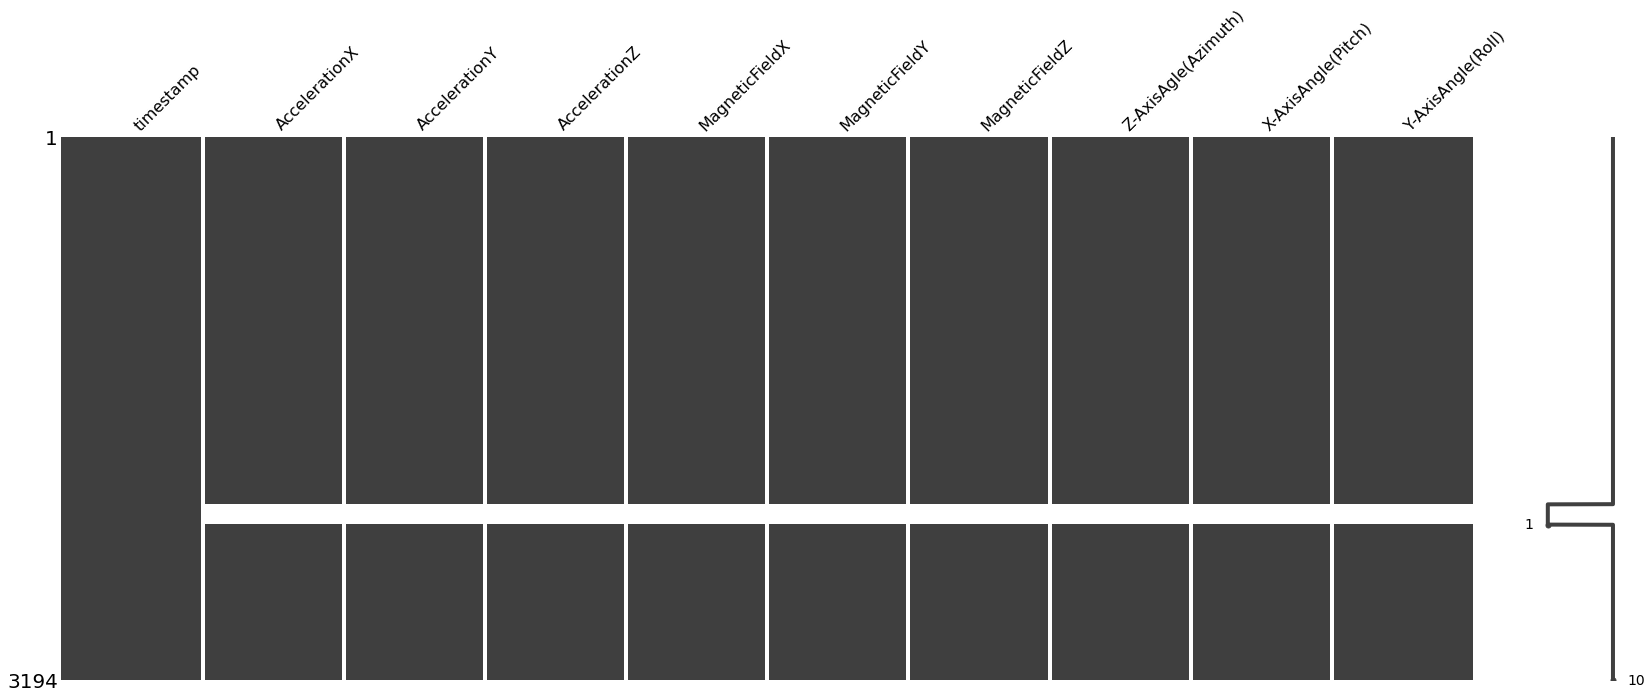

In [ ]:
msno.matrix(data)
#each white line represents missing observations and the lines are visualized in the order they appear in the dataset, top to bottom

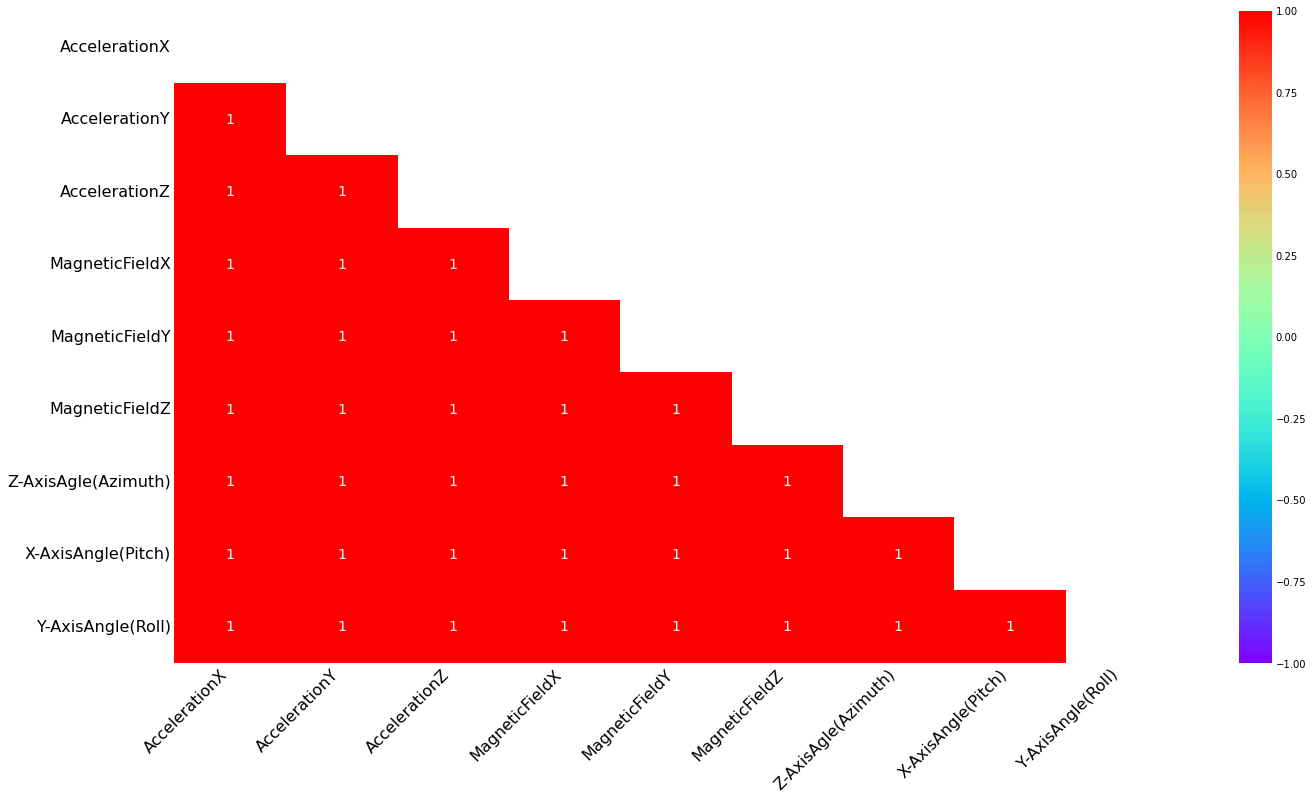

In [ ]:
msno.heatmap(data, cmap='rainbow');

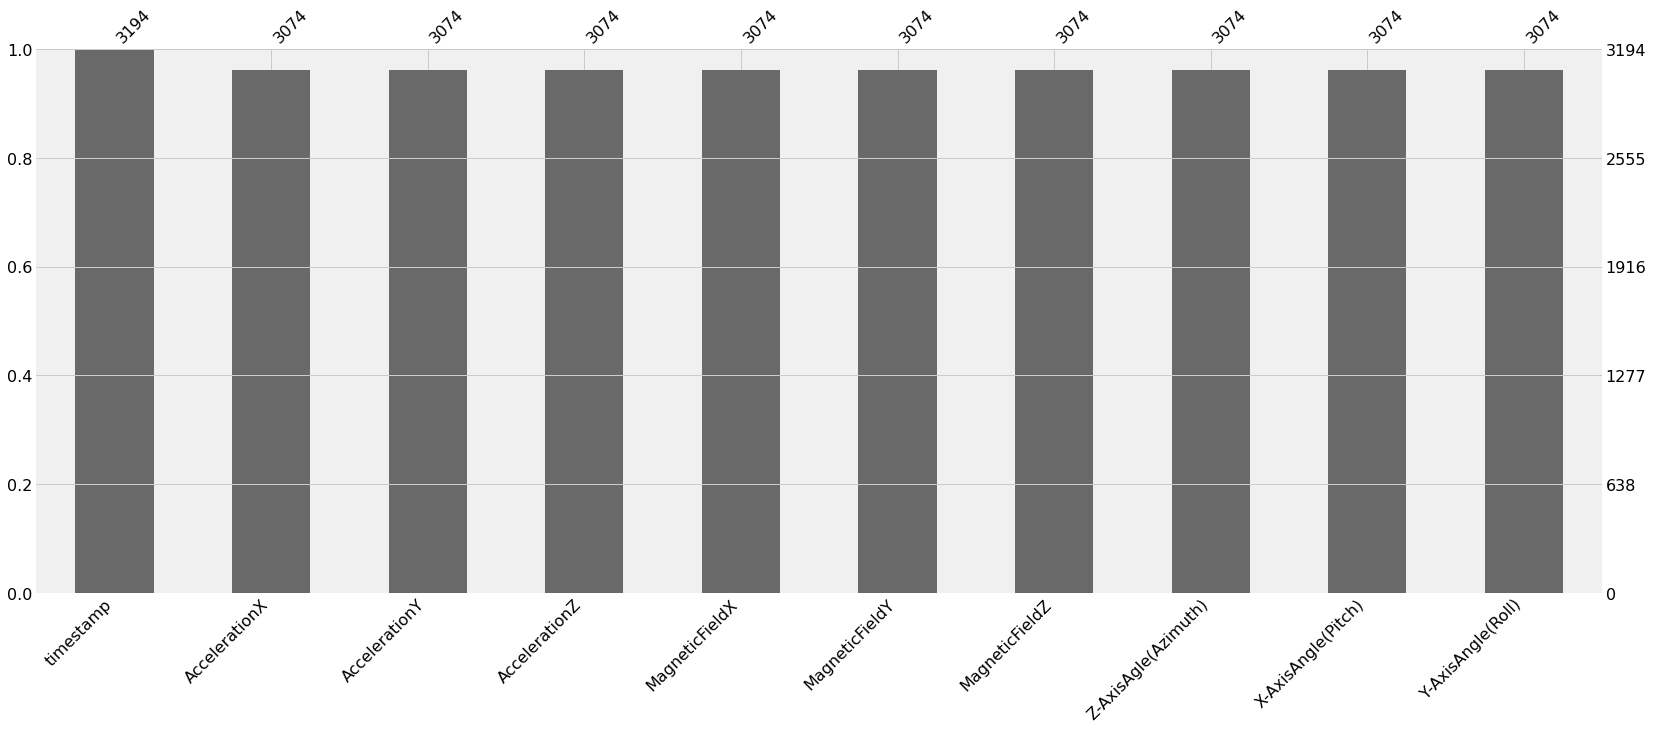

In [ ]:
msno.bar(data)

In Missing Not At Random case, there will be a systematic relationship between missing values and some unobserved factors.

# MICE

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
#we can try lr and other methods
from sklearn.linear_model import Lasso
lr = Lasso()

In [ ]:
#estimator can be null (default is BaysianRidge)
imp = IterativeImputer(estimator=lr,verbose=2, max_iter=100, tol=1e-10, n_nearest_features=2 ,initial_strategy='median',imputation_order='roman')

In [ ]:
newData = imp.fit_transform(data)

[IterativeImputer] Completing matrix with shape (3194, 10)
[IterativeImputer] Ending imputation round 1/100, elapsed time 0.02
[IterativeImputer] Change: 220.32812548102717, scaled tolerance: 0.1422630155 
[IterativeImputer] Ending imputation round 2/100, elapsed time 0.04
[IterativeImputer] Change: 44.215738300004226, scaled tolerance: 0.1422630155 
[IterativeImputer] Ending imputation round 3/100, elapsed time 0.06
[IterativeImputer] Change: 17.408812328062332, scaled tolerance: 0.1422630155 
[IterativeImputer] Ending imputation round 4/100, elapsed time 0.08
[IterativeImputer] Change: 2.5885743430357397, scaled tolerance: 0.1422630155 
[IterativeImputer] Ending imputation round 5/100, elapsed time 0.11
[IterativeImputer] Change: 2.3338777988419466, scaled tolerance: 0.1422630155 
[IterativeImputer] Ending imputation round 6/100, elapsed time 0.15
[IterativeImputer] Change: 2.917243941038896, scaled tolerance: 0.1422630155 
[IterativeImputer] Ending imputation round 7/100, elapsed ti

In [ ]:
newData

array([[ 1.42262948e+09, -3.57700000e+00,  2.10400000e+00, ...,
         1.26404000e+02, -1.21690000e+01, -2.10010000e+01],
       [ 1.42262948e+09, -3.42400000e+00,  2.92700000e+00, ...,
         1.34694000e+02, -1.13220000e+01, -2.58980000e+01],
       [ 1.42262948e+09, -2.50500000e+00,  2.90800000e+00, ...,
         1.50906000e+02, -1.75230000e+01, -1.50170000e+01],
       ...,
       [ 1.42263016e+09, -3.11700000e+00,  5.43600000e+00, ...,
         3.05850000e+01, -3.82050000e+01, -2.12370000e+01],
       [ 1.42263016e+09, -2.86800000e+00,  5.80000000e+00, ...,
         3.27150000e+01, -3.30990000e+01, -1.82490000e+01],
       [ 1.42263016e+09, -2.20800000e+00,  5.58000000e+00, ...,
         3.28200000e+01, -3.40410000e+01, -1.63700000e+01]])

In [ ]:
imputed = pd.DataFrame(newData, columns = ['timestamp',	'AccelerationX',	'AccelerationY', 	'AccelerationZ', 	'MagneticFieldX', 	'MagneticFieldY', 'MagneticFieldZ',	'Z-AxisAgle(Azimuth)', 'X-AxisAngle(Pitch)', 	'Y-AxisAngle(Roll)])'])

In [ ]:
# Count the missing values of each time series
missing_values = imputed.isnull().sum()
print(missing_values)

timestamp              0
AccelerationX          0
AccelerationY          0
AccelerationZ          0
MagneticFieldX         0
MagneticFieldY         0
MagneticFieldZ         0
Z-AxisAgle(Azimuth)    0
X-AxisAngle(Pitch)     0
Y-AxisAngle(Roll)])    0
dtype: int64


In [ ]:
imputed.loc[2170]['AccelerationY'] 

2.0741909248406354

In [ ]:
imputed.loc[2170]['timestamp'] 

1422629840.7177403

In [ ]:
imputed.cov()

,timestamp,AccelerationX,AccelerationY,AccelerationZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ,Z-AxisAgle(Azimuth),X-AxisAngle(Pitch),Y-AxisAngle(Roll)])
timestamp,64057.923396,63.102161,-260.034590,-381.277637,637.677172,485.500319,993.989368,2277.162224,2982.920851,310.792248
AccelerationX,63.102161,4.311886,-0.051488,0.065066,-12.232569,7.904489,6.586289,-4.662338,-10.360796,27.376110
AccelerationY,-260.034590,-0.051488,15.313935,10.324743,-15.474731,-41.666309,-48.287803,-62.921308,-144.219042,0.646673
AccelerationZ,-381.277637,0.065066,10.324743,9.754849,-13.480669,-24.758646,-37.827885,-54.677033,-106.272012,1.455696
MagneticFieldX,637.677172,-12.232569,-15.474731,-13.480669,124.403936,9.890222,20.678558,291.546477,199.040577,-86.109185
MagneticFieldY,485.500319,7.904489,-41.666309,-24.758646,9.890222,234.620192,106.433736,-112.326366,370.927719,49.301801
MagneticFieldZ,993.989368,6.586289,-48.287803,-37.827885,20.678558,106.433736,230.001057,204.521430,449.760715,40.757932
Z-AxisAgle(Azimuth),2277.162224,-4.662338,-62.921308,-54.677033,291.546477,-112.326366,204.521430,3064.433866,637.983733,-35.491589
X-AxisAngle(Pitch),2982.920851,-10.360796,-144.219042,-106.272012,199.040577,370.927719,449.760715,637.983733,1557.751639,-85.593145
Y-AxisAngle(Roll)]),310.792248,27.376110,0.646673,1.455696,-86.109185,49.301801,40.757932,-35.491589,-85.593145,187.437317


In [ ]:
data.cov()

,timestamp,AccelerationX,AccelerationY,AccelerationZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ,Z-AxisAgle(Azimuth),X-AxisAngle(Pitch),Y-AxisAngle(Roll)
timestamp,66559.372425,65.566287,-270.188887,-396.166451,662.578338,504.459005,1032.804451,2366.084949,3099.403302,322.928618
AccelerationX,65.566287,4.480264,-0.053499,0.067607,-12.710249,8.213158,6.843482,-4.844401,-10.765383,28.445142
AccelerationY,-270.188887,-0.053499,15.911941,10.727922,-16.079016,-43.293370,-50.173432,-65.378372,-149.850765,0.671925
AccelerationZ,-396.166451,0.067607,10.727922,10.135773,-14.007086,-25.725465,-39.305055,-56.812160,-110.421911,1.512541
MagneticFieldX,662.578338,-12.710249,-16.079016,-14.007086,129.261883,10.276433,21.486052,302.931305,206.813069,-89.471731
MagneticFieldY,504.459005,8.213158,-43.293370,-25.725465,10.276433,243.782060,110.589951,-116.712687,385.412368,51.227025
MagneticFieldZ,1032.804451,6.843482,-50.173432,-39.305055,21.486052,110.589951,238.982550,212.507948,467.323776,42.349521
Z-AxisAgle(Azimuth),2366.084949,-4.844401,-65.378372,-56.812160,302.931305,-116.712687,212.507948,3184.099360,662.896863,-36.877528
X-AxisAngle(Pitch),3099.403302,-10.765383,-149.850765,-110.421911,206.813069,385.412368,467.323776,662.896863,1618.581511,-88.935539
Y-AxisAngle(Roll),322.928618,28.445142,0.671925,1.512541,-89.471731,51.227025,42.349521,-36.877528,-88.935539,194.756705


In [ ]:
imputed.corr()

,timestamp,AccelerationX,AccelerationY,AccelerationZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ,Z-AxisAgle(Azimuth),X-AxisAngle(Pitch),Y-AxisAngle(Roll)])
timestamp,1.000000,0.119989,-0.262405,-0.479322,0.223439,0.125784,0.258405,0.161417,0.296220,0.089788
AccelerationX,0.119989,1.000000,-0.006525,0.009839,-0.528111,0.248610,0.209264,-0.040500,-0.126323,0.962966
AccelerationY,-0.262405,-0.006525,1.000000,0.844811,-0.354521,-0.695187,-0.813698,-0.290515,-0.933700,0.011906
AccelerationZ,-0.479322,0.009839,0.844811,1.000000,-0.386951,-0.517651,-0.798684,-0.316296,-0.862073,0.033873
MagneticFieldX,0.223439,-0.528111,-0.354521,-0.386951,1.000000,0.057924,0.122278,0.472196,0.452148,-0.563861
MagneticFieldY,0.125784,0.248610,-0.695187,-0.517651,0.057924,1.000000,0.458302,-0.132373,0.613603,0.235177
MagneticFieldZ,0.258405,0.209264,-0.813698,-0.798684,0.122278,0.458302,1.000000,0.243678,0.751407,0.196401
Z-AxisAgle(Azimuth),0.161417,-0.040500,-0.290515,-0.316296,0.472196,-0.132373,0.243678,1.000000,0.292040,-0.046779
X-AxisAngle(Pitch),0.296220,-0.126323,-0.933700,-0.862073,0.452148,0.613603,0.751407,0.292040,1.000000,-0.158319
Y-AxisAngle(Roll)]),0.089788,0.962966,0.011906,0.033873,-0.563861,0.235177,0.196401,-0.046779,-0.158319,1.000000


In [ ]:
data.corr()

,timestamp,AccelerationX,AccelerationY,AccelerationZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ,Z-AxisAgle(Azimuth),X-AxisAngle(Pitch),Y-AxisAngle(Roll)
timestamp,1.000000,0.120067,-0.262544,-0.482330,0.225890,0.125233,0.258959,0.162530,0.298611,0.089692
AccelerationX,0.120067,1.000000,-0.006336,0.010033,-0.528162,0.248518,0.209142,-0.040560,-0.126418,0.962964
AccelerationY,-0.262544,-0.006336,1.000000,0.844745,-0.354538,-0.695119,-0.813634,-0.290455,-0.933749,0.012070
AccelerationZ,-0.482330,0.010033,0.844745,1.000000,-0.386976,-0.517528,-0.798614,-0.316242,-0.862104,0.034043
MagneticFieldX,0.225890,-0.528162,-0.354538,-0.386976,1.000000,0.057890,0.122247,0.472189,0.452143,-0.563903
MagneticFieldY,0.125233,0.248518,-0.695119,-0.517528,0.057890,1.000000,0.458175,-0.132472,0.613561,0.235100
MagneticFieldZ,0.258959,0.209142,-0.813634,-0.798614,0.122247,0.458175,1.000000,0.243612,0.751394,0.196300
Z-AxisAgle(Azimuth),0.162530,-0.040560,-0.290455,-0.316242,0.472189,-0.132472,0.243612,1.000000,0.292002,-0.046830
X-AxisAngle(Pitch),0.298611,-0.126418,-0.933749,-0.862104,0.452143,0.613561,0.751394,0.292002,1.000000,-0.158402
Y-AxisAngle(Roll),0.089692,0.962964,0.012070,0.034043,-0.563903,0.235100,0.196300,-0.046830,-0.158402,1.000000


#Generating missing values- another way
The mechanisms generating missing values can be various but usually they are classified into three main categories defined by (Rubin 1976): missing completely at random (MCAR), missing at random (MAR) and missing not at random (MNAR). The first two are also qualified as ignorable missing values mechanisms, for instance in likelihood-based approaches to handle missing values, whereas the MNAR mechanism generates nonignorable missing values. 
Code is derived from https://github.com/BorisMuzellec/MissingDataOT


###MCAR

Missing Completely At Random values are generated using only the desired proportion of missing values p_miss, i.e. each value have the same probability p_miss of being missing. Therefore, we generate missing values using a Bernoulli distribution of parameter p_miss.


In [ ]:
!pip install utils

In [ ]:
import torch
from utils import *
import tensorflow as tensor

In [ ]:
X = data
timestamp = X["timestamp"]#saving the timestamp column
X=X.drop(columns=["timestamp" , "GyroX" , "GyroY" ,"GyroZ"], axis=1) #assuming that timestamps are not missing! and deleting constant columns

In [ ]:
X

In [ ]:
import math


In [ ]:
Xtr = torch.as_tensor(np.array(X).astype('float')) #convert to tensor object to prepare for the function
Xtr

In [ ]:
#X: the initial data (can be only complete for now) as a matrix or data.frame
#p_miss: proportion of missing values to generate for variables which will have missing values
#mecha: one of "MCAR", "MAR", "MNAR" (default: “MCAR”)

def produce_NA(X, p_miss, mecha="MCAR", opt=None, p_obs=None, q=None):    
    to_torch = torch.is_tensor(X) ## output a pytorch tensor, or a numpy array
    if not to_torch:
        X = X.astype(np.float32)
        X = torch.from_numpy(X)
    
    if mecha == "MAR":
        mask = MAR_mask(X, p_miss, p_obs).double()
    elif mecha == "MNAR" and opt == "logistic":
        mask = MNAR_mask_logistic(X, p_miss, p_obs).double()
    elif mecha == "MNAR" and opt == "quantile":
        mask = MNAR_mask_quantiles(X, p_miss, q, 1-p_obs).double()
    elif mecha == "MNAR" and opt == "selfmasked":
        mask = MNAR_self_mask_logistic(X, p_miss).double()
    else:
        mask = (torch.rand(X.shape) < p_miss).double()
    
    X_nas = X.clone()
    X_nas[mask.bool()] = np.nan
    
    return {'X_init': X.double(), 'X_incomp': X_nas.double(), 'mask': mask}
#X_init: the initial data
#X_incomp: the data with the newly generated missing values
#mask: a matrix indexing the generated missing values

In [ ]:
X_miss_mcar = produce_NA(Xtr, p_miss=0.4, mecha="MCAR")

X_mcar = X_miss_mcar['X_incomp'] #the new dataset
R_mcar = X_miss_mcar['mask']

print("Percentage of newly generated missing values: ", (R_mcar.sum()).numpy()/np.prod(R_mcar.size())*100, " %")

In [ ]:
X_miss_mcar['mask'] #matrix indexing the generated missing values

In [ ]:
X_mcar

In [ ]:
X_miss = X_mcar.numpy()#tensor to numpy

In [ ]:
X_miss

In [ ]:
#Xpd = pd.DataFrame(X_miss) #numpy to dataframe
Xpd=pd.DataFrame(data=X_miss, columns=X.columns) #numpy to dataframe
Xpd

In [ ]:
# Count the missing values of each time series
missing_values = Xpd.isnull().sum()
print(missing_values)

In [ ]:
# Visualize the dataset
Xpd.plot(legend=False);
plt.tight_layout();

# Count the missing values of each time series
missing_values = Xpd.isnull().sum()
print(missing_values)

### Imputing missing values
When you have missing data points, how can you fill them in?

In this exercise, you'll practice using different interpolation methods to fill in some missing values, visualizing the result each time. But first, you will create the function (```interpolate_and_plot()```) you'll use to interpolate missing data points and plot them.

In [ ]:
# Create a function we'll use to interpolate and plot
def interpolate_and_plot(Xpd, interpolation):
    
    # Create a boolean mask for missing values
    missing_values = Xpd.isna()
    
    # Interpolate the missing values
    Xpd_interp = Xpd.interpolate(interpolation)
    
    # Plot the results, highlighting the interpolated values in black
    fig, ax = plt.subplots(figsize=(10, 5))
    Xpd_interp.plot(color='k', alpha=0.6, ax=ax, legend=False);
    
    # Note plot the interpolated values on top in red
    Xpd_interp[missing_values].plot(ax=ax, color='r', lw=3, legend=False);

In [ ]:
# Interpolate using the latest non-missing value
interpolation_type = 'quadratic' #try linear or zero or quadratic
interpolate_and_plot(Xpd, interpolation_type)

MICE

In [ ]:
pip install autoimpute

In [ ]:
pd.DataFrame(data.isnull().sum(), columns=["records missing"]).T

,timestamp,AccelerationX,AccelerationY,AccelerationZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ,Z-AxisAgle(Azimuth),X-AxisAngle(Pitch),Y-AxisAngle(Roll)
records missing,120,120,120,120,120,120,120,120,120,120


In [ ]:
# simple example using default instance of MiceImputer
from autoimpute.imputations import MiceImputer

In [ ]:
# simple example using default instance of SingleImputer
mi = MultipleImputer(return_list=True)
mi_data_full = mi.fit_transform(data)

/usr/local/lib/python3.7/dist-packages/autoimpute/imputations/series/pmm.py:169: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  **self.sample_kwargs
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [σ, beta, alpha]


/usr/local/lib/python3.7/dist-packages/pymc3/step_methods/hmc/quadpotential.py:224: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(1, self._stds, out=self._inv_stds)
/usr/local/lib/python3.7/dist-packages/pymc3/step_methods/hmc/quadpotential.py:203: RuntimeWarning: invalid value encountered in multiply
  return np.multiply(self._var, x, out=out)


ValueError: ignored

In [ ]:
# print the results
print_header("Results from MultipleImputer running PMM on column y five times")


AttributeError: ignored

In [ ]:
transformed=pd.DataFrame(data=imp, columns=data.columns) #numpy to dataframe

ValueError: ignored

In [ ]:
imputed.loc[2163]

timestamp              1.422630e+09
AccelerationX         -2.168107e-01
AccelerationY          2.073879e+00
AccelerationZ          7.812379e+00
MagneticFieldX        -1.460452e+01
MagneticFieldY         1.201002e+01
MagneticFieldZ        -2.818796e+01
Z-AxisAgle(Azimuth)    5.667380e+01
X-AxisAngle(Pitch)    -7.126666e+00
Y-AxisAngle(Roll)])   -1.428257e+00
Name: 2163, dtype: float64

In [ ]:
transformed.loc[21603]


KeyError: ignored

another try

In [ ]:
from autoimpute.imputations import SingleImputer, MultipleImputer, MiceImputer
si = SingleImputer() # pass through data once
mi = MultipleImputer() # pass through data multiple times
mice = MiceImputer() # pass through data multiple times and iteratively optimize imputations in each column

In [ ]:
#dataframe to narray
#nXpd = Xpd.to_numpy()

In [ ]:
#nXpd

In [ ]:
# simple example using default instance of MiceImputer
#imp = MiceImputer()

# fit transform returns a generator by default, calculating each imputation method lazily
#nXpd_filled = imp.fit_transform(Xpd)

In [ ]:
#nXpd_filled

In [ ]:
#transformed=pd.DataFrame(data=nXpd_filled, columns=X.columns) #generator object to dataframe

### Visualizing predicted values
When dealing with time series data, it's useful to visualize model predictions on top of the "actual" values that are used to test the model.

In this exercise, after splitting the data (stored in the variables ```X``` and ```y```) into training and test sets, you'll build a model and then visualize the model's predictions on top of the testing data in order to estimate the model's performance.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,
                                                   shuffle=False, random_state=1)

# Fit our model and generate predictions
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
print(score)

In [ ]:
# Visualize our predictions along with the "true" values, and print the score
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(range(len(y_test)), y_test, color='k', lw=3);
ax.plot(range(len(predictions)), predictions, color='r', lw=2);

## Advanced time series prediction
- Data is messy
    - Real-world data is often messy
    - The two most common problems are missing data and outliers
    - This often happens because of human error, machine error malfunction, database failure, etc..
    - Visualizing your raw data makes it easier to spot these problems
- Interpolation: using time to fill in missing data
    - A common way to deal with missing data is to interpolate missing values
    - With timeseries data, you can use time to assist in interpolation.
    - In this case, interpolation means using the known values on either side of a gap in the data to make assumptions about what's missing
- Using a rolling window to transform data
    - Another common use of rolling windows is to transform the data
- Finding outliers in your data
    - Outliers are datapoints that are significantly statistically different from the dataset.
    - They can have negative effects on the predictive power of your model, biasing it away from its "true" value
    - One solution is to remove or replace outliers with a more representative value
> Note: Be very careful about doing this - often it is difficult to determine what is a legitimately extreme value vs an abberation.

### Visualizing messy data
Let's take a look at a new dataset - this one is a bit less-clean than what you've seen before.

As always, you'll first start by visualizing the raw data. Take a close look and try to find datapoints that could be problematic for fitting models.

In [ ]:
prices = pd.read_csv('./dataset/prices_null.csv', index_col=0, parse_dates=True)

In [ ]:
# Visualize the dataset
prices.plot(legend=False);
plt.tight_layout();

# Count the missing values of each time series
missing_values = prices.isnull().sum()
print(missing_values)

### Transforming raw data
In the last chapter, you calculated the rolling mean. In this exercise, you will define a function that calculates the percent change of the latest data point from the mean of a window of previous data points. This function will help you calculate the percent change over a rolling window.

This is a more stable kind of time series that is often useful in machine learning.

In [ ]:
# Your custom function
def percent_change(series):
    # Collect all *but* the last value of this window, then the final value
    previous_values = series[:-1]
    last_value = series[-1]
    
    # Calculate the % difference between the last value and the mean of earlier values
    percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
    return percent_change

# Apply your custom function and plot
prices_perc = prices.rolling(20).apply(percent_change)
prices_perc.loc["2014":"2015"].plot();

### Handling outliers
In this exercise, you'll handle outliers - data points that are so different from the rest of your data, that you treat them differently from other "normal-looking" data points. You'll use the output from the previous exercise (percent change over time) to detect the outliers. First you will write a function that replaces outlier data points with the median value from the entire time series.

In [ ]:
def replace_outliers(series):
    # Calculate the absolute difference of each timepoint from the series mean
    absolute_differences_from_mean = np.abs(series - np.mean(series))
    
    # Calculate a mask for the difference that are > 3 standard deviations from zero
    this_mask = absolute_differences_from_mean > (np.std(series) * 3)
    
    # Replace these values with the median across the data
    series[this_mask] = np.nanmedian(series)
    return series

# Apply your preprocessing functino to the timeseries and plot the results
prices_perc = prices_perc.apply(replace_outliers)
prices_perc.loc["2014":"2015"].plot();

## Creating features over time
- Calculating "date-based" features
    - Thus far we've focused on calculating "statistical" features - these are features that correspond statistical properties of the data, like "mean" , "standard deviation", etc
    - However, don't forget the timeseries data oftenhas more "human" features associated with it, like days of the week, holidays, etc.
    - These features are often useful when dealing with timeseries data that spans multiple years (such as stock value over time)

### Engineering multiple rolling features at once
Now that you've practiced some simple feature engineering, let's move on to something more complex. You'll calculate a collection of features for your time series data and visualize what they look like over time. This process resembles how many other time series models operate.

In [ ]:
# Define a rolling window with Pandas, excluding the right-most datapoint of the window
prices_perc_rolling = prices_perc['EBAY'].rolling(20, min_periods=5, closed='right')

# Define the features you'll calculate for each window
features_to_calculate = [np.min, np.max, np.mean, np.std]

# Calculate these features for your rolling window object
features = prices_perc_rolling.aggregate(features_to_calculate)

# Plot the results
ax = features.loc[:"2011-01"].plot();
prices_perc['EBAY'].loc[:"2011-01"].plot(ax=ax, color='k', alpha=0.2, lw=3);
ax.legend(loc=(1.01, 0.6));

### Percentiles and partial functions
In this exercise, you'll practice how to pre-choose arguments of a function so that you can pre-configure how it runs. You'll use this to calculate several percentiles of your data using the same ```percentile()``` function in numpy.

In [ ]:
from functools import partial
percentiles = [1, 10, 25, 50, 75, 90, 99]

# Use a list comprehension to create a partial function for each quantile
percentile_functions = [partial(np.percentile, q=percentile) for percentile in percentiles]

# Calculate each of these quantiles on the data using a rolling window
prices_perc_rolling = prices_perc['EBAY'].rolling(20, min_periods=5, closed='right')
features_percentiles = prices_perc_rolling.aggregate(percentile_functions)

# Plot a subset of the result
ax = features_percentiles.loc[:"2011-01"].plot(cmap=plt.cm.viridis);
ax.legend(percentiles, loc=(1.01, 0.5));
plt.savefig('../images/price_percentile.png')

### Using "date" information
It's easy to think of timestamps as pure numbers, but don't forget they generally correspond to things that happen in the real world. That means there's often extra information encoded in the data such as "is it a weekday?" or "is it a holiday?". This information is often useful in predicting timeseries data.

In [ ]:
# Extract date features from the data, add them as columns
prices_perc['day_of_week'] = prices_perc.index.dayofweek
prices_perc['week_of_year'] = prices_perc.index.weekofyear
prices_perc['month_of_year'] = prices_perc.index.month

# Print prices_perc
print(prices_perc)